In [51]:
import sys
sys.path[:]
sys.path.insert(0, '/mnt/home/landerson/src/')
sys.path.insert(0, '/mnt/home/landerson/.local/lib/python3.6/site-packages')
import pynbody
import gizmo_read
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.constants import c, m_p, M_sun
import h5py
import glob
from astropy.table import Table, Column
from matplotlib.colors import LogNorm, PowerNorm
from astropy import coordinates as coord

In [3]:
datadir = '/mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/'
#file = 'lsr-1-rslice-5.m12f-res7100-md-sliced-gcat-dr2.hdf5'

In [4]:
fname_pattern = datadir + 'lsr-?-rslice-?.????-res7100-md-sliced-gcat-dr2.hdf5'
flist = glob.glob(fname_pattern)
if len(flist) < 1:
    raise RuntimeError('No files match '+ fname_pattern)

In [5]:
dn = 10000000  #number of rows to read at once
da = 0.5       #size of one side of pixel in degrees

#X and Y bins for histogram, in degrees
xe = np.arange(-180., 180.5, da)
ye = np.arange(-90., 90.5, da)
X,Y = np.meshgrid(xe[:-1], ye[:-1])

#matrix to hold counts per bin
H_counts = np.zeros_like(X.T)

In [6]:
for fn in sorted(flist):
    print('Processing {}'.format(fn))
    with h5py.File(fn, mode='r') as h5f:  # open file
        n = h5f['l'].shape[0]  #get total number of rows
    
        #loop over rows in chunks of size dn to avoid memory overload
        for chunk in range(0, n, dn):
            dc = min(chunk + dn, n)

            #do source count histogram
            h, xe, ye = np.histogram2d(
                h5f['l'][chunk:dc],h5f['b'][chunk:dc],
                bins=[xe, ye])
            H_counts += h
    
        #convert to counts/squared arcmin
        H_dens = H_counts / (da * 60.) ** 2

Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-0.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-1.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-2.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-3.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-4.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-5.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-6.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-7.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-8.m1

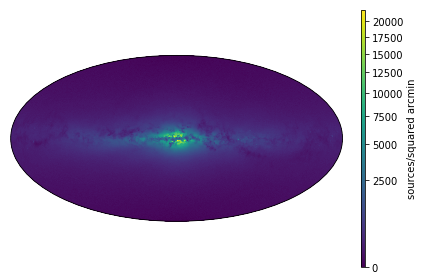

In [59]:
fig = plt.figure()

ax = plt.subplot(111, projection='hammer')
#need to convert longitude and latitude to radians 
# if using a spherical projection like Hammer or Aitoff
X_rad = np.radians(X)
Y_rad = np.radians(Y)

cbh = ax.pcolormesh(X_rad, Y_rad, H_counts.T, 
                    norm=PowerNorm(gamma=0.5),
                    cmap='viridis',
                    vmin=0, vmax=H_counts.max())

ax.grid('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.colorbar(cbh, label='sources/squared arcmin',
             orientation='vertical', fraction=0.03, aspect=60)

fig.tight_layout()

In [19]:
dn = 1000000 #number of rows to read at once
dA = 0.01 #size of dust bin
dx = 0.01 #size of position bin 
#range of color (X direction) and absolute magnitude (Y direction) for histogram
xe = np.arange(-1, 1 + dx, dx)
ye = np.arange(-1, 1 + dx, dx)
ze = np.arange(-1, 1 + dx, dx)
X,Y = np.meshgrid(xe[:-1], ye[:-1])

#list of matrices to hold the results for the three selections on tangential velocity
H = [np.zeros_like(X.T), np.zeros_like(X.T), np.zeros_like(X.T)]

In [20]:
ra    = []
dec   = []

parallax_true  = []
parallax_error = []

parallax = []
px_true  = []
py_true  = []
pz_true  = []
lognh    = []
ebv      = []
A0       = []

In [21]:
ra

[]

Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-0.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-1.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-2.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-3.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-4.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-5.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-6.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-7.m12f-res7100-md-sliced-gcat-dr2.hdf5
Processing /mnt/ceph/users/firesims/ananke/GaiaMocks/m12f/test/lsr-1-rslice-8.m1

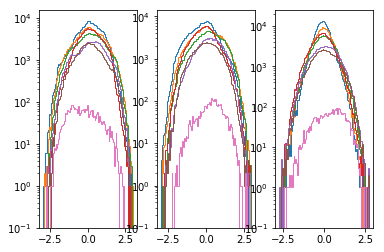

In [22]:
fig, axes = plt.subplots(1, 3)
for fn in sorted(flist):
    print('Processing {}'.format(fn))
    f = h5py.File(fn, mode='r')
    n = f['l'].shape[0]
    for chunk in range(0, n, dn):
        dc = min(chunk + dn, n)
        #this histogram requires some selections on observational uncertainties in the parallax and photometry
        lsel = (f['parallax_true'][chunk:dc] > 1/3)
        psel = (f['parallax_over_error'][chunk:dc] > 10)
        gsel = (f['phot_g_mean_mag_error'][chunk:dc] < 0.22)
        bsel = (f['phot_bp_mean_mag_error'][chunk:dc] < 0.054)
        rsel = (f['phot_rp_mean_mag_error'][chunk:dc] < 0.054)
        
        #it also uses only low-extinction sources
        #ebvsel = (f['a_g_val'][chunk:dc] < 0.15)
        
        #put all the quality cuts together
        sel=(lsel & psel & gsel & rsel & bsel) # & ebvsel)
        for li, ke in zip([ra,    dec,   parallax_true,   parallax_error,   parallax,   px_true,   py_true,   pz_true,   lognh,   ebv,   A0],
                          ['ra', 'dec', 'parallax_true', 'parallax_error', 'parallax', 'px_true', 'py_true', 'pz_true', 'lognh', 'ebv', 'A0']):
            li.extend(f[ke][chunk:dc][sel].tolist())

        #rotate to galactocentric
        #c = coord.SkyCoord(ra=f['ra'][chunk:dc][sel]*u.deg, 
        #                   dec=f['dec'][chunk:dc][sel]*u.deg, 
        #                   distance=1./f['parallax_true'][chunk:dc][sel]*u.kpc)
        #galc = c.transform_to(coord.Galactocentric)
        #make the histograms for the three velocity cuts
        for ax, xval in zip(axes, [f['px_true'][chunk:dc][sel], f['py_true'][chunk:dc][sel], f['pz_true'][chunk:dc][sel]]):
            ax.hist(xval, bins=100, log=True, histtype='step')
        xearray = [xe, xe, ye]
        xarray = [f['px_true'][chunk:dc][sel], 
                  f['px_true'][chunk:dc][sel], 
                  f['py_true'][chunk:dc][sel]]
        yearray = [ye, ze, ze]
        yarray = [f['py_true'][chunk:dc][sel], 
                  f['pz_true'][chunk:dc][sel], 
                  f['pz_true'][chunk:dc][sel]]
        for i in range(3):
            h, xenow, yenow = np.histogram2d(xarray[i], yarray[i], bins=[xearray[i], yearray[i]])
            H[i] += h
    #convert to counts per magnitude squared
    H_dens = [h / ((dx*1e3) ** 2) for h in H]        
    f.close()

In [25]:
len(ra)

1054950

(0.7178009259259259, 0.11611111111111116, 0.2689583333333333, 0.8441666666666665)


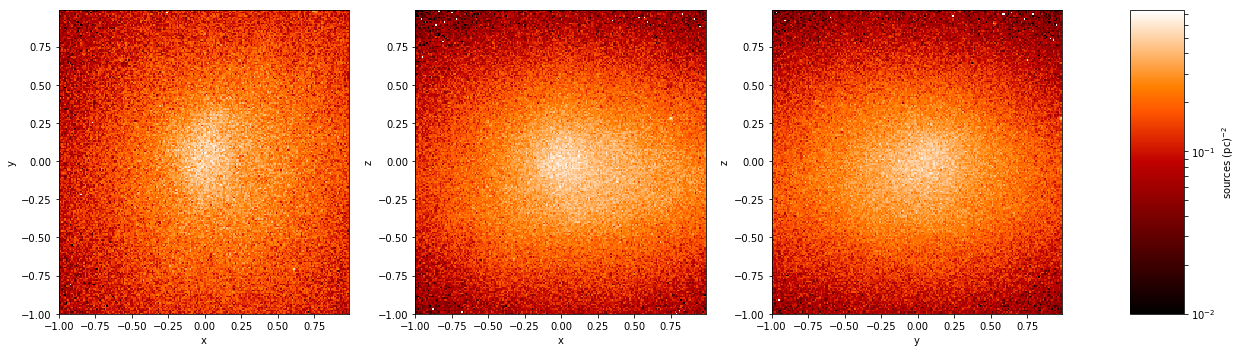

In [26]:
#set up the colormap
from matplotlib import cm
my_cmap = cm.get_cmap('gist_heat')
my_cmap.set_bad('w')
my_cmap.set_under('w')

#make the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    im = axs[i].pcolormesh(
        X, Y, H_dens[i].T,
        norm=LogNorm(), cmap=my_cmap)

xlabel = ['x', 'x', 'y']
ylabel = ['y', 'z', 'z']
for i in range(3):
    axs[i].set_xlabel(xlabel[i])
    axs[i].set_ylabel(ylabel[i])

#format and add color bar
fig.tight_layout(w_pad=-0.6)
fig.subplots_adjust(right=0.84)
plt.tight_layout()
dims = fig.axes[2].get_position().bounds
print(dims)
cbar_ax = fig.add_axes([1.05, dims[1], 0.05, dims[3]])
fig.colorbar(im, cax=cbar_ax, label=r'sources (pc)${}^{-2}$')


In [33]:
import scipy.stats

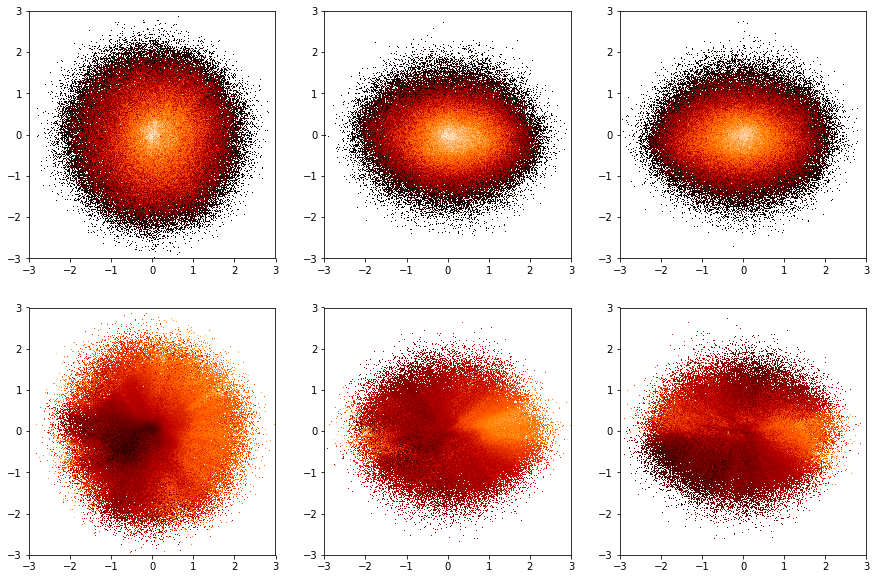

In [47]:
dn = 1000000 #number of rows to read at once
dA = 0.01 #size of dust bin
dx = 0.01 #size of position bin 
#range of color (X direction) and absolute magnitude (Y direction) for histogram
xe = np.arange(-3, 3 + dx, dx)
ye = np.arange(-3, 3 + dx, dx)
ze = np.arange(-3, 3 + dx, dx)
X,Y = np.meshgrid(xe[:-1], ye[:-1])

#list of matrices to hold the results for the three selections on tangential velocity
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for axtr, axbi, xx, yy in zip(axes[0], axes[1], [px_true, px_true, py_true], [py_true, pz_true, pz_true]):
    h, xenow, yenow = np.histogram2d(xx, yy, bins=[xe, ye])
    axtr.pcolormesh(X, Y, h.T, norm=LogNorm(), cmap = my_cmap)
    statistic, x_edges, y_edges, bin_number = scipy.stats.binned_statistic_2d(xx, yy, A0, bins=[xe, ye])
    statistic[np.isnan(statistic)] = 0.0
    axbi.pcolormesh(X, Y, statistic.T, norm=LogNorm(), cmap=my_cmap)

In [52]:
t = Table()
units = ['deg', 'deg', 'mas', 'mas', 'mas', 'kpc', 'kpc', 'kpc', 'cm^-2', None, None]
for li, ke, u in zip([ra,    dec,   parallax_true,   parallax_error,   parallax,   px_true,   py_true,   pz_true,   lognh,   ebv,   A0],
                          ['ra', 'dec', 'parallax_true', 'parallax_error', 'parallax', 'px_true', 'py_true', 'pz_true', 'lognh', 'ebv', 'A0'], units):
    t[ke] = Column(li, unit=u, description=ke)


In [58]:
t.write('snparallax10distance3kpc.hdf5', path='data', serialize_meta=True)

In [43]:
statistic

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [154]:
np.sum(H[0])

369579.0

In [14]:
data = h5py.File(dir + file)

In [49]:
file2 = 'lsr-1-rslice-6.m12f-res7100-md-sliced-gcat-dr2.hdf5'
data2 = h5py.File(dir + file2)

In [36]:
data['A0'].value

array([0.77588177, 1.6133845 , 2.511279  , ..., 0.2425336 , 0.39538053,
       0.37240437], dtype=float32)

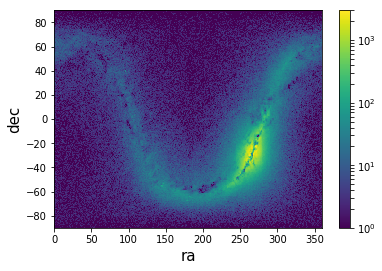

In [39]:
nbins = 300
xbins = np.linspace(0, 360, nbins)
ybins = np.linspace(-90, 90, nbins)

H, xe, ye = np.histogram2d(data['ra'].value, data['dec'].value, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
plt.colorbar()


In [46]:
data['parallax_true'].value

array([0.13658888, 0.13663149, 0.13693351, ..., 0.13636245, 0.13676623,
       0.1346569 ])

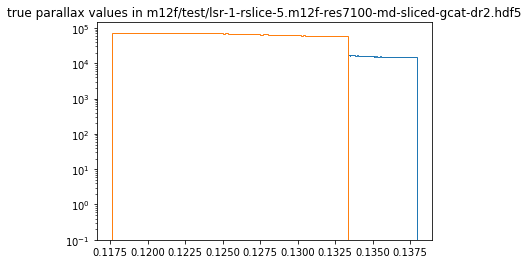

In [50]:
plt.hist(data['parallax_true'].value, bins=100, histtype='step', log=True)
plt.hist(data2['parallax_true'].value, bins=100, histtype='step', log=True)

plt.title('true parallax values in m12f/test/lsr-1-rslice-5.m12f-res7100-md-sliced-gcat-dr2.hdf5')

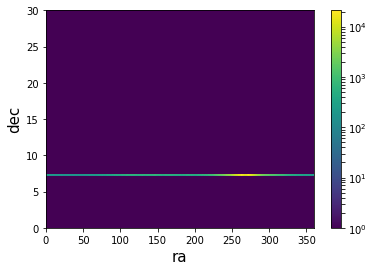

In [44]:
nbins = 300
xbins = np.linspace(0, 360, nbins)
ybins = np.linspace(0, 30, nbins)

H, xe, ye = np.histogram2d(data['ra'].value, 1./data['parallax_true'].value, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
plt.colorbar()


In [27]:
print(list(data.keys()))

['A0', 'a_g_bp_val', 'a_g_rp_val', 'a_g_val', 'age', 'alpha', 'b', 'b_true', 'bp_g', 'bp_g_int', 'bp_g_true', 'bp_rp', 'bp_rp_int', 'bp_rp_true', 'calcium', 'carbon', 'dec', 'dec_error', 'dec_true', 'dhel_true', 'dmod_true', 'e_bp_min_rp_val', 'ebv', 'feh', 'g_rp', 'g_rp_int', 'g_rp_true', 'helium', 'l', 'l_true', 'logg', 'lognh', 'lum_val', 'mact', 'magnesium', 'mini', 'mtip', 'neon', 'nitrogen', 'oxygen', 'parallax', 'parallax_error', 'parallax_over_error', 'parallax_true', 'parentid', 'partid', 'phot_bp_mean_mag', 'phot_bp_mean_mag_error', 'phot_bp_mean_mag_int', 'phot_bp_mean_mag_true', 'phot_g_mean_mag', 'phot_g_mean_mag_error', 'phot_g_mean_mag_int', 'phot_g_mean_mag_true', 'phot_rp_mean_mag', 'phot_rp_mean_mag_error', 'phot_rp_mean_mag_int', 'phot_rp_mean_mag_true', 'pmb_true', 'pmdec', 'pmdec_error', 'pmdec_true', 'pml_true', 'pmra', 'pmra_error', 'pmra_true', 'px_true', 'py_true', 'pz_true', 'ra', 'ra_error', 'ra_true', 'radial_velocity', 'radial_velocity_error', 'radial_veloc

In [ ]:
data = h5py.File

In [ ]:
data = h5py.Dataset

In [28]:
data = Table.read(dir+file, path='A0')

KeyboardInterrupt: 